In [9]:
# Setup
import fastf1
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fastf1.Cache.enable_cache('../cache')

# Descargar 3 sesiones
years = [2021, 2022, 2025]
sessions = {}

for year in years:
    print(f"⏳ Descargando {year}...")
    session = fastf1.get_session(year, 'Bahrain', 'Q')
    session.load()
    sessions[year] = session
    print(f"✅ {year} cargado")

⏳ Descargando 2021...


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

✅ 2021 cargado
⏳ Descargando 2022...


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

✅ 2022 cargado
⏳ Descargando 2025...


core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 

✅ 2025 cargado


In [10]:
poles = {}

for year, session in sessions.items():
    fastest = session.laps.pick_fastest()
    poles[year] = {
        'lap':  fastest,
        'telemetry': fastest.get_telemetry(),
        'driver': fastest['Driver'],
        'time': fastest['LapTime'],
        'team': fastest['Team']
    }
    print(f"{year}: {poles[year]['driver']} - {poles[year]['time']}")

2021: VER - 0 days 00:01:28.997000
2022: LEC - 0 days 00:01:30.558000
2025: PIA - 0 days 00:01:29.841000


In [11]:
# Extraer tiempos en segundos
tiempos = {}
for year in years:
    tiempo = poles[year]['time']. total_seconds()
    tiempos[year] = tiempo
    print(f"{year}: {tiempo:.3f}s")

# Calcular diferencias
diff_2022_vs_2021 = tiempos[2022] - tiempos[2021]
diff_2025_vs_2022 = tiempos[2025] - tiempos[2022]

print(f"\n📊 Diferencia 2022 vs 2021: {diff_2022_vs_2021:+.3f}s")
print(f"📊 Diferencia 2025 vs 2022: {diff_2025_vs_2022:+.3f}s")

2021: 88.997s
2022: 90.558s
2025: 89.841s

📊 Diferencia 2022 vs 2021: +1.561s
📊 Diferencia 2025 vs 2022: -0.717s


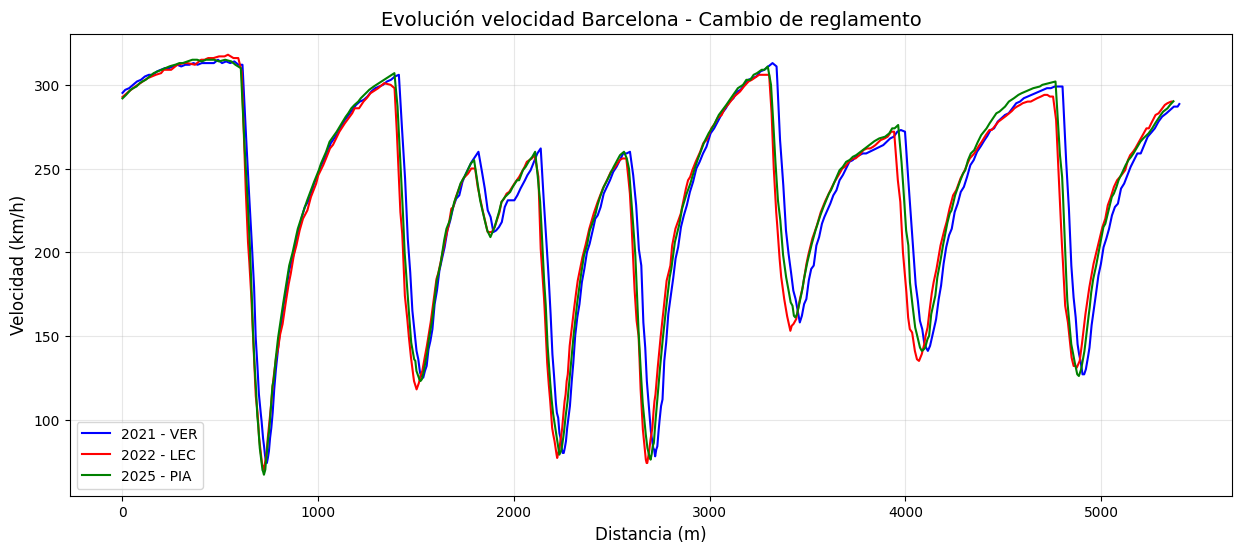

In [12]:
plt.figure(figsize=(15, 6))

colores = {2021: 'blue', 2022: 'red', 2025: 'green'}

for year in years:
    tel = poles[year]['telemetry']
    plt.plot(tel['Distance'], tel['Speed'], 
             linewidth=1.5, 
             color=colores[year],
             label=f"{year} - {poles[year]['driver']}")

plt.xlabel('Distancia (m)', fontsize=12)
plt.ylabel('Velocidad (km/h)', fontsize=12)
plt.title('Evolución velocidad Barcelona - Cambio de reglamento', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()